In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import tensorflow
LABEL = 'ActivityEncoded'
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
x = pd.read_csv('transformed.csv')
y = le.fit_transform(x['activity'].values.ravel())
x= x.drop(columns='activity')


In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)
from sklearn.preprocessing import StandardScaler

# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_train_data_lr = scaler.transform(X_train)
X_train = np.asarray(X_train_data_lr, dtype= np.float32).reshape(-1, 1, 112)



In [8]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout
model = Sequential()
# RNN layer
model.add(LSTM(units = 128))
# Dropout layer
model.add(Dropout(0.5)) 
# Dense layer with ReLu
model.add(Dense(units = 64, activation='relu'))
# Softmax layer
model.add(Dense(y_train.shape[0], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [9]:
model.build(X_train.shape)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (6501, 128)               123392    
                                                                 
 dropout_1 (Dropout)         (6501, 128)               0         
                                                                 
 dense_1 (Dense)             (6501, 64)                8256      
                                                                 
 dense_2 (Dense)             (6501, 6501)              422565    
                                                                 
Total params: 554,213
Trainable params: 554,213
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.20, batch_size = 1024, verbose = 1)

Epoch 1/50


ValueError: in user code:

    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\sarah\anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 6501) are incompatible


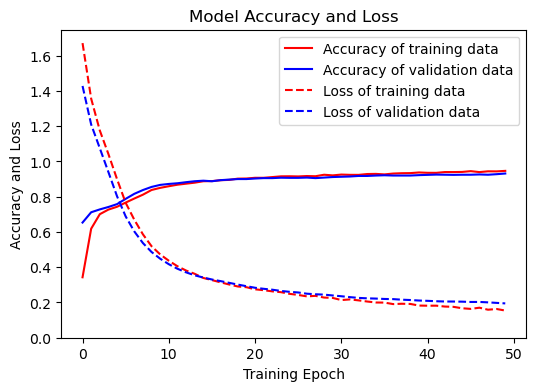

204/204 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       583
           1       0.98      0.99      0.99      1957
           2       0.99      0.98      0.99       376
           3       0.98      0.99      0.98       308
           4       0.84      0.82      0.83       654
           5       0.97      0.98      0.98      2623

    accuracy                           0.95      6501
   macro avg       0.94      0.93      0.93      6501
weighted avg       0.95      0.95      0.95      6501



In [53]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

# Print confusion matrix for training data
y_pred_train = model.predict(X_train)
# Take the class with the highest probability from the train predictions
max_y_pred_train = np.argmax(y_pred_train, axis=1)
from sklearn.metrics import classification_report
from sklearn import preprocessing

rounded_labels=np.argmax(y_train, axis=1)
rounded_labels[1]
print(classification_report(rounded_labels, max_y_pred_train))

In [54]:
X_test_data_lr = scaler.transform(X_test)
X_test = np.asarray(X_test_data_lr, dtype= np.float32).reshape(-1, 1, 112)
y_test_pred = model.predict(X_test)

51/51 [==============================] - 0s 5ms/step


In [55]:
max_y_pred_test = np.argmax(y_test_pred, axis=1)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]
print(classification_report(rounded_labels, max_y_pred_test))
print(confusion_matrix(rounded_labels, max_y_pred_test))


              precision    recall  f1-score   support

           0       0.80      0.69      0.74       143
           1       0.98      0.98      0.98       481
           2       0.99      0.99      0.99       116
           3       0.96      1.00      0.98        82
           4       0.72      0.78      0.75       159
           5       0.96      0.96      0.96       645

    accuracy                           0.93      1626
   macro avg       0.90      0.90      0.90      1626
weighted avg       0.93      0.93      0.93      1626

[[ 99   0   0   0  33  11]
 [  2 473   0   0   3   3]
 [  0   0 115   1   0   0]
 [  0   0   0  82   0   0]
 [ 14  10   1   0 124  10]
 [  8   0   0   2  13 622]]


In [57]:
predict_X = pd.read_csv('transformed_test.csv')
X = scaler.transform(predict_X)
X_train = np.asarray(X, dtype= np.float32).reshape(-1, 1, 112)

In [60]:
predict_y = model.predict(X_train)

82/82 [==============================] - 0s 5ms/step


In [67]:
prediction=np.argmax(predict_y, axis=1)
pred = le.inverse_transform(prediction)

In [68]:
submit = pd.read_csv('predictions_sample.csv')
submit['prediction'] = pred
submit.to_csv('submitLSTM.csv',index=False)

In [69]:
svm = pd.read_csv('submitSVM.csv')
lstm = pd.read_csv('submitLSTM.csv')
confusion_matrix(svm['prediction'],lstm['prediction'])

array([[171,   3,   0,  16,  23,   6],
       [  0, 791,   0,   0,   6,   0],
       [  0,   0,  98,  17,   9,   1],
       [  0,   0,   3, 105,   4,   1],
       [ 21,   4,   0,  60, 318,   7],
       [  9,   1,   0,  14,  17, 916]])